<a href="https://colab.research.google.com/github/busung/machine-learning-practice/blob/main/12_RNN(%EC%86%8C%EC%9B%A8%EC%9C%B5_14%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN

## IMDB

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)#자주 나오는 단어 500개를 뽑아줌(빈도로 만든 어휘사전)

In [2]:
print(train_input.shape,test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [4]:
#1 = 문장의 시작, 2 = num_wrods의 500개에 포함되지 않는다.
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[0])

1


In [6]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [7]:
print(np.mean(lengths),np.median(lengths))#중간값과 평균의 차이가 크다 = 데이터가 편향되어 있다

238.71364 178.0


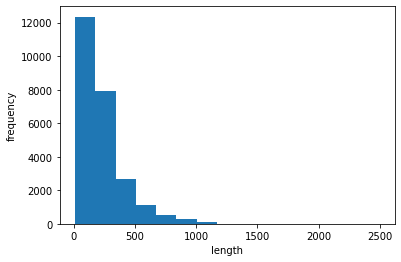

In [8]:
#대표성을 가지는 문장 길이를 정하기 위해 시각화
import matplotlib.pyplot as plt
plt.hist(lengths,bins=15)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

## 시퀀스 패딩
* 대표성을 가지는 길이를 100이라고 선택
* 문장의 길이를 모두 100으로 맞추는 전처리 과정
* 길면 자르고 짧으면 0으로 100을 맞춤
  * 이 때 기본적으로 뒤를 자르지만, 언어에 따라 중요한 부분이 다르기에 사용자가 지정해 줘야함
* 문장 시작 숫자가 1이기에 0이면 아무 지장이 없음

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100) 
val_seq = pad_sequences(test_input, maxlen=100) 

In [10]:
print(train_seq.shape)

(25000, 100)


## 모델링

In [11]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100,500)))#train,test set을 one-hot encoding 해 줌, 이 때 총 단어수가 500개이므로 한 단어는 크기 500의 vector가 됨
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [12]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh[0][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
print(train_oh.shape)

(25000, 100, 500)


In [14]:
np.sum(train_oh[0][0])

1.0

In [15]:
val_oh = keras.utils.to_categorical(val_seq)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 훈련

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights = True)
history = model.fit(train_oh,train_target,epochs = 100, batch_size=64, validation_data = (val_oh,test_target))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 임베딩
* 원-핫 인코딩은 너무 비효율적
* 단어를 vector화 함으로써 조금 더 효율적인 연산가능

In [17]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500,16,input_length=100))#500의 단어들을 크기 16의 vector로 임베딩 해달라, 이 때 input은 100이 들어옴
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [18]:
model2.summary()
#8*16(완전연결)+8*8(RNN끼리의 순환연결)+8(절편)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights = True)
history = model2.fit(train_oh,train_target,epochs = 100, batch_size=64, validation_data = (val_oh,test_target))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# LSTM

In [19]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500,16,input_length=100))#500의 단어들을 크기 16의 vector로 임베딩 해달라, 이 때 input은 100이 들어옴
model3.add(keras.layers.LSTM(8))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [20]:
model3.summary()
#SimpleRNN의 4배 많은 800개(한 셀당 4개의 가중치가 더 있으므로)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights = True)
history = model3.fit(train_oh,train_target,epochs = 100, batch_size=64, validation_data = (val_oh,test_target))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## Dropout 적용

In [ ]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.LSTM(8, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 다층 연결

In [21]:
model5 = keras.Sequential()

model5.add(keras.layers.Embedding(500, 16, input_length=100))
model5.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))#LSTM의 다층연결에선 모든 Timestep이 반환되어야 하기 때문
model5.add(keras.layers.LSTM(8, dropout=0.3))
model5.add(keras.layers.Dense(1, activation='sigmoid'))

model5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model5.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model5.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU
* 파라미터수를 줄여 성능은 비슷하지만 속도는 빠른 모델

In [22]:
model6 = keras.Sequential()

model6.add(keras.layers.Embedding(500, 16, input_length=100))
model6.add(keras.layers.GRU(8))
model6.add(keras.layers.Dense(1, activation='sigmoid'))

model6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model6.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model6.fit(train_seq, train_target, epochs=100, batch_size=64,validation_data=(val_seq, val_target),callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()